In [ ]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

In [2]:
def map_to_conference(team):
    conferences = {
        'ATL': 'Eastern',
        'BOS': 'Eastern',
        'BKN': 'Eastern',
        'CHA': 'Eastern',
        'CHI': 'Eastern',
        'CLE': 'Eastern',
        'DAL': 'Western',
        'DEN': 'Western',
        'DET': 'Eastern',
        'GSW': 'Western',
        'HOU': 'Western',
        'IND': 'Eastern',
        'LAC': 'Western',
        'LAL': 'Western',
        'MEM': 'Western',
        'MIA': 'Eastern',
        'MIL': 'Eastern',
        'MIN': 'Western',
        'NOP': 'Western',
        'NYK': 'Eastern',
        'OKC': 'Western',
        'ORL': 'Eastern',
        'PHI': 'Eastern',
        'PHX': 'Western',
        'POR': 'Western',
        'SAC': 'Western',
        'SAS': 'Western',
        'TOR': 'Eastern',
        'UTA': 'Western',
        'WAS': 'Eastern',
    }

    return conferences.get(team, 'Unknown')

In [3]:
current_directory = os.getcwd()
detailed_players = 'nba2021_per_game.csv'
detailed_advanced = 'nba2021_advanced.csv'
motion_detail = 'player_metrics_open.csv'
motion_path = 'path_detail_open.csv'


playersDet = 'PlayerDetails'
open_motion = 'Open'

In [24]:
file_path_det = os.path.join(current_directory,playersDet,detailed_players)
file_path_motion = os.path.join(current_directory,open_motion,motion_detail)
file_path_advanced = os.path.join(current_directory,playersDet,detailed_advanced)
file_motion_path = os.path.join(current_directory,open_motion,motion_path)

df_detailed = pd.read_csv(file_path_det)
df_motion = pd.read_csv(file_path_motion)
df_advanced = pd.read_csv(file_path_advanced)
df_motion_path = pd.read_csv(file_motion_path)

In [25]:
df_motion['FullName'] = df_motion['fnm'] + ' ' + df_motion['lnm']
df_motion_path['FullName'] = df_motion_path['fnm'] + ' ' + df_motion_path['lnm']
df_motion = df_motion.drop(columns=['fnm', 'lnm'], axis=1)

merged_df1 = pd.merge(df_detailed, df_advanced, right_on=['Player','Tm'], left_on=['Player','Tm'], how='inner', suffixes=('', '_df2'))
idx = merged_df1.groupby('Player')['G'].idxmax()
merged_df1 = merged_df1.loc[idx]
merged_df2 = pd.merge(merged_df1, df_motion, right_on='FullName', left_on='Player', how='inner')
merged_df = pd.merge(merged_df1, df_motion_path, right_on='FullName', left_on='Player', how='inner')
merged_df['Team'] = merged_df['Tm']
merged_df['Conference'] = merged_df['Team'].apply(map_to_conference)

column_order = ['Player', 'Pos', 'Team', 'Age','hght','n','G','MP','USG%','FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'TS%','bx', 'by', 'bz', 'rt', 'rx', 'ry', 'rz', 'rv', 'rvx', 'rvy', 'rvz', 'mnv', 'mnvt', 'mnvx', 'mnvy', 'mnvz', 'mxv', 'mxvt', 'mxvx', 'mxvy', 'mxvz', 'ta1t', 'ta1x', 'ta1y', 'ta1z', 'ta2t', 'ta2x', 'ta2y', 'ta2z', 'at1t', 'at1x', 'at1y', 'at1z', 'at2t', 'at2x', 'at2y', 'at2z', 'lr1t', 'lr1x', 'lr1y', 'lr1z', 'lr2t', 'lr2x', 'lr2y', 'lr2z', 'rl1t', 'rl1x', 'rl1y', 'rl1z', 'rl2t', 'rl2x', 'rl2y', 'rl2z', 'pl', 'spl', 'plr']  

#### Executable for data analysis

In [26]:
merged_df['Pos'] = merged_df['Pos'].replace({'PG': 'G', 'SG': 'G', 'SF': 'F', 'PF': 'F', 'F-C': 'C', 'SF-PF': 'F'})

In [27]:
unique_values = merged_df['Pos'].unique()

# Print the unique values
print("Unique values in the column:")
print(unique_values)

Unique values in the column:
['F' 'G' 'C']


#### Additional changes for data

### Heatmap

In [28]:
heatmap = merged_df.loc[merged_df.Pos.isin(['G','F', 'C']), ['Pos','FT%','2P%','3P%','FG%','TS%']].groupby('Pos').mean()
print(heatmap)

          FT%       2P%       3P%       FG%       TS%
Pos                                                  
C    0.693930  0.422069  0.382266  0.462929  0.595033
F    0.738949  0.480074  0.403592  0.480169  0.604410
G    0.798548  0.485682  0.375681  0.439013  0.567117


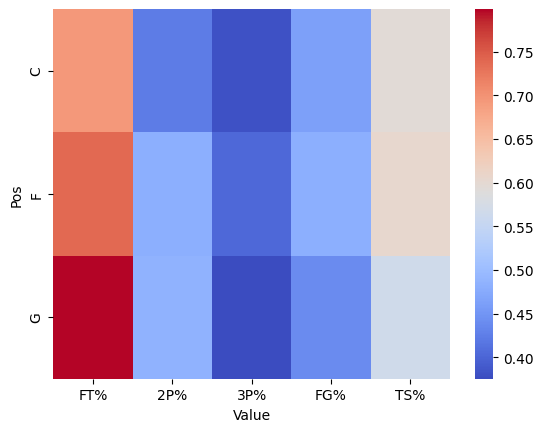

In [29]:
sns.heatmap(heatmap, cmap='coolwarm')
plt.xlabel('Value')
plt.ylabel('Pos')
plt.show()

### Histogram of FGA

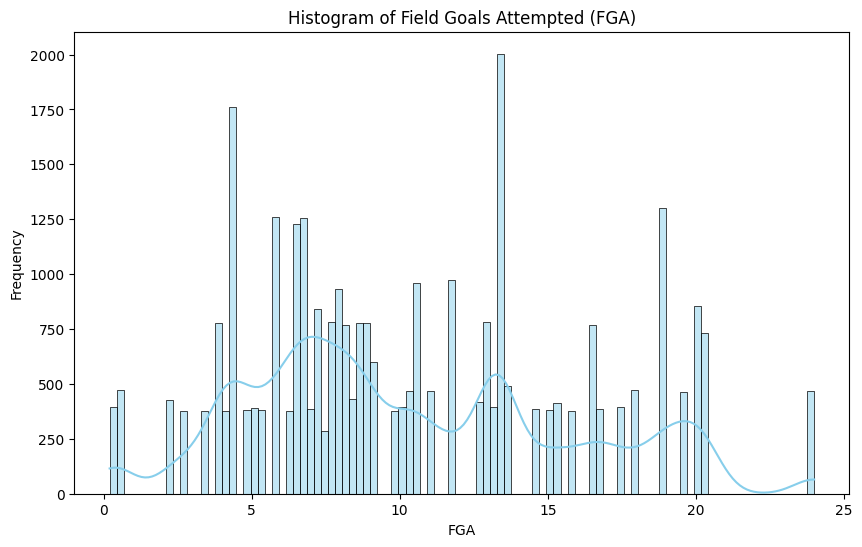

In [32]:
fga_data = merged_df['FGA']
plt.figure(figsize=(10, 6))
sns.histplot(fga_data, bins=100, kde=True, color='skyblue')
plt.title('Histogram of Field Goals Attempted (FGA)')
plt.xlabel('FGA')
plt.ylabel('Frequency')
plt.show()

pagal sita matome, jog duomenys galima klasterizuoti i tris grupes pagal ismestu metimu kieki ir taip atlikti analize pagal tai kaip daznai zaidejas mesdavo per rungtynes. Tai bus lyg atspindys, kuris leis susidaryti geresni vaizda apie metimo technikos efektyvuma, kadangi mazai metantys zaidejai gali tureti gerus procentus del mazo duomenu kiekio. Taip pat tai gal leis pastebeti, koks feature galetu buti isskirtas kaip skiriamasis bruozas sudaryti sias grupes ir galbut kaip klasteriai jie pasizymes tam tikromis savybemis, budingomis tik tam tikra metimu kieki atliekantiems zaidejams (panasi trajektorija, panasus pataikymo procentai is tam tikru distanciju)

In [35]:
def categorize_fga(fga):
    if fga <= 10:
        return 1
    elif 10 < fga <= 18:
        return 2
    else:
        return 3

# Apply the function to create a new column 'fga_category'
merged_df['fga_category'] = merged_df['FGA'].apply(categorize_fga)

### Histogram of release time

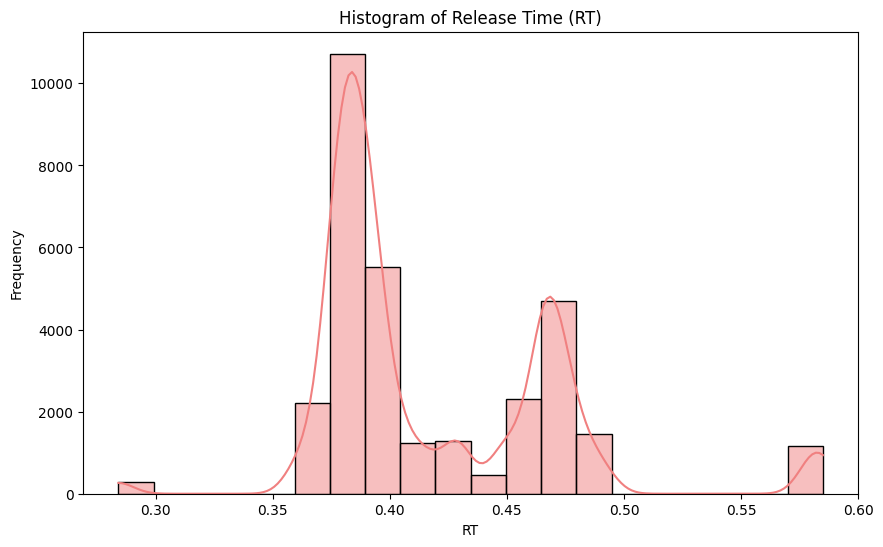

In [34]:
rt_data = merged_df['rt'] * -1 

plt.figure(figsize=(10, 6))
sns.histplot(rt_data, bins=20, kde=True, color='lightcoral')
plt.title('Histogram of Release Time (RT)')
plt.xlabel('RT')
plt.ylabel('Frequency')
plt.show()


Siame grafike vel matome, jog galima iskirti dvi grupes, tai viena, kurioje ismetimo greitis didesnis nei 0.37 (apytiksle skilimo reiksme) ir tuos kurie ismeta greiciau.

In [36]:
def categorize_rt(rt):
    if rt >= -0.37:
        return 1
    else:
        return 2

merged_df['rt_category'] = merged_df['rt'].apply(categorize_rt)

### Heatmap based on newly created groups 

In [40]:
heatmap_rt = merged_df.loc[merged_df.rt_category.isin([1,2]), ['rt_category','FT%','2P%','3P%','FG%','TS%']].groupby('rt_category').mean()
print(heatmap_rt)

                  FT%       2P%       3P%       FG%       TS%
rt_category                                                  
1            0.801675  0.534089  0.381349  0.451375  0.583472
2            0.767924  0.478694  0.387789  0.457408  0.583911


In [42]:
heatmap_fga = merged_df.loc[merged_df.fga_category.isin([1,2,3]), ['fga_category','2P%','3P%','FG%','TS%']].groupby('fga_category').mean()
print(heatmap_fga)

                   2P%       3P%       FG%       TS%
fga_category                                        
1             0.454068  0.397188  0.453660  0.584353
2             0.496410  0.364745  0.447809  0.567109
3             0.557868  0.406347  0.499530  0.628075


simple shooting form

In [44]:
def update_plot(player):
    player_data = merged_df[merged_df['FullName'] == player]
    x_coordinates = player_data['cx']
    y_coordinates = player_data['cz']

    plt.figure(figsize=(10, 6))
    plt.plot(x_coordinates, y_coordinates, marker='o', linestyle='', color='g')

    # Adding titles and labels
    plt.title('Shooting motion')
    plt.xlim(-2, 2)
    plt.ylim(2, 10)

    # Show grid
    plt.grid(True)

    # Display the plot
    plt.show()

player_dropdown = widgets.Dropdown(
    options=merged_df['FullName'].unique(),
    description='Player:',
    value='Kevin Durant'
)

# Use the interactive function to update the plot
widgets.interactive(update_plot, player=player_dropdown)

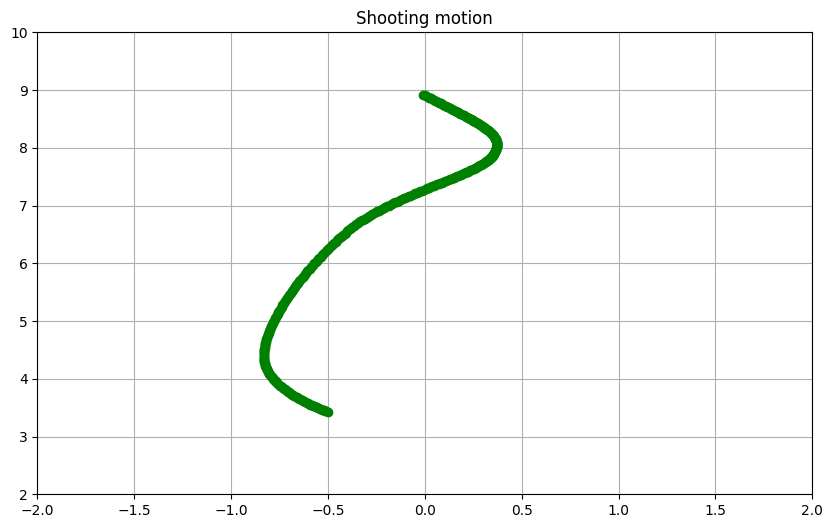

In [103]:
harden = merged_df[merged_df['FullName'] == 'Kevin Durant']
x_coordinates = harden['cx']
y_coordinates = harden['cz']



plt.figure(figsize=(10, 6))
plt.plot(x_coordinates, y_coordinates, marker='o', linestyle='', color='g')

# Adding titles and labels
plt.title('Shooting motion')
plt.xlim(-2, 2)  
plt.ylim(2, 10) 

# Show grid
plt.grid(True)

# Display the plot
plt.show()

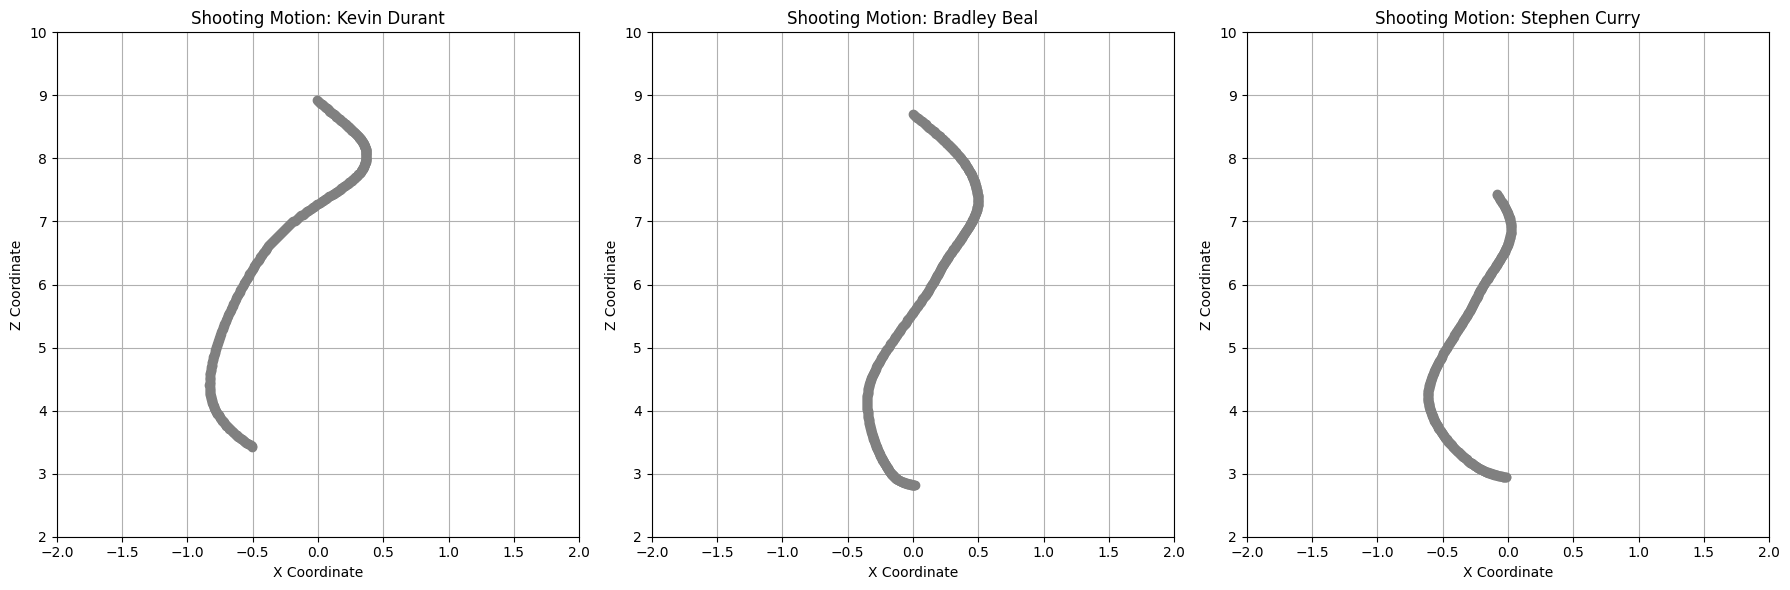

In [107]:
players = ['Kevin Durant', 'Bradley Beal', 'Stephen Curry']

# Create a figure
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

# Iterate over each player to create a subplot for each
for i, player in enumerate(players, start=1):
    # Filter the DataFrame for the current player
    player_df = merged_df[merged_df['FullName'] == player]
    
    # Extract the x and y coordinates
    x_coordinates = player_df['cx']
    y_coordinates = player_df['cz']
    
    # Create a subplot for the current player
    plt.subplot(1, 3, i)  # (1 row, 3 columns, ith subplot)
    plt.plot(x_coordinates, y_coordinates, marker='o', linestyle='', color='grey')
    
    # Adding titles and labels
    plt.title(f'Shooting Motion: {player}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Z Coordinate')
    plt.xlim(-2, 2)
    plt.ylim(2, 10)
    plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()